In [ ]:
# Recurrent Neural Network



# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train (1).csv


In [ ]:
import pandas as pd

dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Part 2 - Building the RNN


# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Input

In [ ]:
# Initialising the RNN
regressor = Sequential()

In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
timesteps = 60
input_dim = 1
regressor.add(Input(shape=(timesteps, input_dim)))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding the second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding the third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding the fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [ ]:
#Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 102ms/step - loss: 0.1188
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 0.0073
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0055
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 0.0064
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - loss: 0.0055
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0040
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - loss: 0.0048
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0048
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 0.0051
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - loss: 0.0043
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0041
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - loss: 0.0047
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0044
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 0.0038
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


In [ ]:
#Part 3 - Making the predictions and visualising the results

#Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
#Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test) - 60: ].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


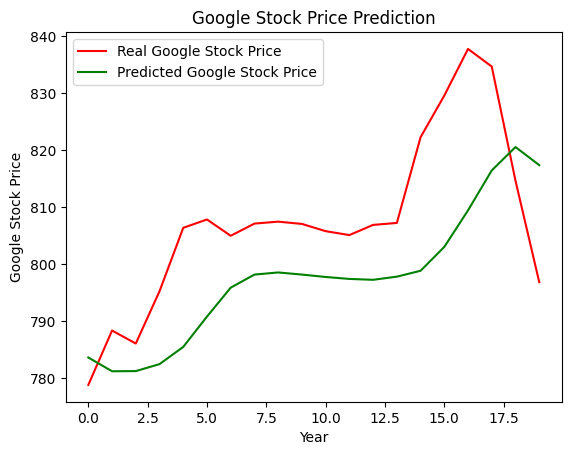

In [ ]:
#Visualing the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Year')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()